In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import special
from scipy.integrate import solve_ivp

In [16]:
# Define the function to deliver the r.h.s. of the system
def f(t,y):
    return y[1],-y[0]
# This is the place to insert other DE-Systems. Maybe try van der Pol.
#
# Integrate dy/dt=f(t,y)
#teval=np.linspace(0.,10.,1000)
r0=[1.,0.]
t0=0.
t1=10.
dt=0.001
rtol=1.e-12
atol=1.e-14
teval=np.linspace(t0,t1,int((t1-t0)/dt+1))
sol=solve_ivp(f, [t0, t1], r0,method='DOP853',t_eval=teval,rtol=rtol,atol=atol)
#sol=solve_ivp(f, [0, 10], [1, 0],t_eval=teval)

<IPython.core.display.Javascript object>


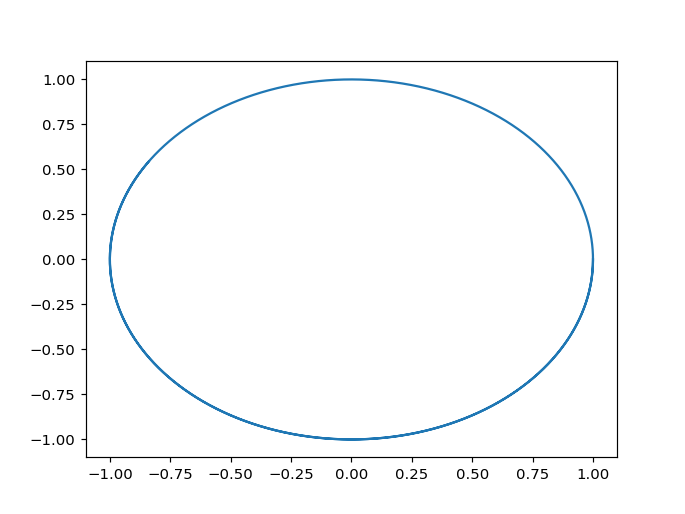

In [20]:
%matplotlib notebook
# plot the solutions curves (x,v)
x=sol.y[0]
v=sol.y[1]
plt.plot(x,v)
#plt.plot(v)

In [21]:
# Calculate the time derivatives of x and v
xdot=np.gradient(x,dt,edge_order=2)
vdot=np.gradient(v,dt,edge_order=2)
t=sol.t.shape
p0=np.ones(3)

In [26]:
# Define the fuction xdot and vdot are to be fitted to
def fit(XY,*a):        # The variable argument *a
    x,v=XY             # Remeber that xdot is in general a function of x and v
    return a[0]+a[1]*x+a[2]*v #+a[3]*x**2+a[4]*x*v+a[5]*v**2
#
# Define the fuction for the integration routine, this is for checking the result, or in the future for
# calculating ahead of the time series and doing a forecast. This function takes two sets of parameters.
# One for xdot and one for vdot, we call it a and b
def func(t,XY,*argv):
    #a=argv[0]
    #b=argv[1]
    a,b=argv
    x,y=XY
    #a=args[0]
    return [a[0]+a[1]*x+a[2]*y+a[3]*x**2+a[4]*x*y+a[5]*y**2,b[0]+b[1]*x+b[2]*y+b[3]*x**2+b[4]*x*y+b[5]*y**2]

In [27]:
%matplotlib notebook
# Now we check how good is the reprodction by solving the 
params=np.zeros((2,6))
XY=np.array([x,v])
popt,pcov = curve_fit(fit,(x,v),xdot,p0=np.ones(3))
p1=popt
popt,pcov = curve_fit(fit,(x,v),vdot,p0=np.ones(3))
p2=popt
params=np.array([p1,p2])
solfit=solve_ivp(func, [t0, t1], r0,method='DOP853',t_eval=teval,rtol=rtol,atol=atol,args=(p1,p2))
#solfit=solve_ivp(func, [0, 1000.], [1, 0],t_eval=teval,method='RK45',args=(p1,p2))
xfit=solfit.y[0]
vfit=solfit.y[1]
#plt.plot(xfit)
#plt.plot(vfit)
plt.plot(xfit,vfit)
# Tadaaah, wen wundert's, dass rauskommt, was man reinsteckt, hehehehe

IndexError: index 3 is out of bounds for axis 0 with size 3

In [28]:
# Und jetzt schauen wir noch die Parameter an, so ganz glücklich bin ich damit noch nicht.
print(p1)

[ 4.72503494e-12 -1.45627780e-10  9.99999833e-01]


In [29]:
print(p2)

[-2.16719166e-10 -9.99999834e-01 -2.81264459e-10]


In [19]:
sol.t

array([0.000e+00, 1.000e-03, 2.000e-03, ..., 9.998e+00, 9.999e+00,
       1.000e+01])